In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label
from tabulate import tabulate


#%pip install opencv-python # Required to import cv2 !!!
import cv2

from IPython.display import display, Latex, Math

import os
import time

plt.rcParams['figure.dpi'] = 250

# Task 1

In [2]:
A_1 = np.array([
    [1, 0],
    [0, 1]
]) 

A_2 = np.array([
    [1, 2],
    [1, 1], 
    [1, 2]
])

A_3 = np.array([
    [2, 1, 1],
    [2, 1, 1], 
    [1, 1, 2]
])

A_4 = np.array([
    [2, 1, 0],
    [1, 2, 3], 
    [0, 3, 3]
])

In [3]:
def NMF(V, d, delta = 1e-9, maxiter = 1000, seed = 0, store_norms = False):
    """
    ((Skriv en forklaring på hva funksjonen gjør her))
    input:
        V: (m,n) input array
        d: integer, Number of components we want to decompose V into
        delta, float, small number for safe division
        maxiter: integer, maximum number of iterations
        seed: integer, random seed
    output:
        W: (m,d) array
        H: (d,n) array
    """

    if seed != 0:
        np.random.seed(seed)
    
    norms = np.zeros(maxiter)

    #Initialize W and H to random numbers between 0 and 1 with the correct shape
    m = np.shape(V)[0]
    n = np.shape(V)[1]
    W_0 = np.random.uniform(0.0, 1.0, m*d).reshape(m,d)
    H_0 = np.random.uniform(0.0, 1.0, d*n).reshape(d,n)

    #Scale the matrixes
    W_0 = np.sqrt(np.mean(V)/d)*W_0
    H_0 = np.sqrt(np.mean(V)/d)*H_0
    #print("W_0 ",W_0)
    #print("H_0 ",H_0)
    
    W_next = np.copy(W_0)
    W_prev = np.copy(W_0)
    H_next = np.copy(H_0)
    H_prev = np.copy(H_0)
    
    for k in range(maxiter):
        #gir samme resultat
        #H_temp = np.divide(np.multiply(H_prev,np.dot(W_prev.T,V)),np.linalg.multi_dot([W_prev.T,W_prev,H_prev])+delta)
        #W_temp = np.divide(np.multiply(W_prev,np.dot(V,H_next.T)),np.linalg.multi_dot([W_prev,H_next,H_next.T])+delta)

        H_next = (H_prev * np.dot(W_prev.T,V)) / (np.linalg.multi_dot([W_prev.T,W_prev,H_prev])+delta)
        W_next = (W_prev * np.dot(V,H_next.T)) / (np.linalg.multi_dot([W_prev,H_next,H_next.T])+delta)
        H_prev = np.copy(H_next)
        W_prev = np.copy(W_next)
        norms[k] = np.linalg.norm(V- np.dot(W_next, H_next), 'fro')

    if store_norms == False:
        return W_next, H_next
    else:
        return W_next, H_next, norms

In [4]:
#def pretty_print(A_1, 1, delta = 1e-9, maxiter = 1000, seed = 0)

## 1d) 

In [5]:
def test_1d():
    W_next_A_1, H_next_A_1 = NMF(A_1, 1, delta = 1e-9, maxiter = 1000, seed = 0)
    W_next_A_1_new_seed, H_next_A_1_new_seed = NMF(A_1, 1, delta = 1e-9, maxiter = 1000, seed = 8)

    W_next_A_2, H_next_A_2 = NMF(A_2, 1, delta = 1e-9, maxiter = 1000, seed = 1)   
    W_next_A_2_new_seed, H_next_A_2_new_seed = NMF(A_2, 1, delta = 1e-9, maxiter = 1000, seed = 23)    
 

    print("Matrix A_1:")
    #print( np.dot(W_next_A_1.T,A_1) / (np.linalg.multi_dot([W_next_A_1.T,W_next_A_1,H_next_A_1])))
    data_A11 = [np.array(["W","H","WH","Norm","W.T A / W.T W H"]),[np.round(W_next_A_1,3),np.round(H_next_A_1,3),np.dot(W_next_A_1,H_next_A_1),np.linalg.norm(A_1- np.dot(W_next_A_1,H_next_A_1), 'fro'),np.dot(W_next_A_1.T,A_1) / (np.linalg.multi_dot([W_next_A_1.T,W_next_A_1,H_next_A_1]))]]
    print(tabulate(data_A11, headers='firstrow', tablefmt='fancy_grid'))


    #print(f"W: \n {W_next_A_1}")
    #print(f"H: \n {H_next_A_1}")
    #print(f"WH: \n {np.dot(W_next_A_1,H_next_A_1)}")
    #print(f"Norm: {np.linalg.norm(A_1- np.dot(W_next_A_1,H_next_A_1), 'fro')}") 

    
    print()
    print("Matrix A_1 with new seed:")
    data_A1_new_seed = [np.array(["W","H","WH","Norm","W.T A / W.T W H"]),[np.round(W_next_A_1_new_seed,3),np.round(H_next_A_1_new_seed,3),np.round(np.dot(W_next_A_1_new_seed,H_next_A_1_new_seed),3),np.linalg.norm(A_1- np.dot(W_next_A_1_new_seed,H_next_A_1_new_seed), 'fro'),np.dot(W_next_A_1_new_seed.T,A_1) / (np.linalg.multi_dot([W_next_A_1_new_seed.T,W_next_A_1_new_seed,H_next_A_1_new_seed]))]]
    print(tabulate(data_A1_new_seed, headers='firstrow', tablefmt='fancy_grid'))
    #print(f"W: \n {W_next_A_1_new_seed}")
    #print(f"H: \n {H_next_A_1_new_seed}")
    #print(f"WH: \n {np.dot(W_next_A_1_new_seed,H_next_A_1_new_seed)}")
    #print(f"Norm: {np.linalg.norm(A_1- np.dot(W_next_A_1_new_seed,H_next_A_1_new_seed), 'fro')}") 
    #print("\n\n")

    

    print("Matrix A_2:")
    # print(f"W: \n {W_next_A_2}")
    # print(f"H: \n {H_next_A_2}")
    # print(f"WH: \n {np.dot(W_next_A_2,H_next_A_2)}")
    # print(f"Norm: {np.linalg.norm(A_2- np.dot(W_next_A_2,H_next_A_2), 'fro')}")

    data_A21 = [np.array(["W","H","WH","Norm","W.T A / W.T W H"]),[np.round(W_next_A_2,3),np.round(H_next_A_2,3),np.round(np.dot(W_next_A_2,H_next_A_2),3),np.linalg.norm(A_2- np.dot(W_next_A_2,H_next_A_2), 'fro'),np.dot(W_next_A_2.T,A_2) / (np.linalg.multi_dot([W_next_A_2.T,W_next_A_2,H_next_A_2]))]]
    print(tabulate(data_A21, headers='firstrow', tablefmt='fancy_grid'))

    #print()
    print("Matrix A_2 new seed:")
    # print(f"W: \n {W_next_A_2_new_seed}")
    # print(f"H: \n {H_next_A_2_new_seed}")
    # print(f"WH: \n {np.dot(W_next_A_2_new_seed,H_next_A_2_new_seed)}")
    # print(f"Norm: {np.linalg.norm(A_2- np.dot(W_next_A_2_new_seed,H_next_A_2_new_seed), 'fro')}")
    data_A2_new_seed = [np.array(["W","H","WH","Norm","W.T A / W.T W H"]),[np.round(W_next_A_2_new_seed,3),np.round(H_next_A_2_new_seed,3),np.round(np.dot(W_next_A_2_new_seed,H_next_A_2_new_seed),3),np.linalg.norm(A_2- np.dot(W_next_A_2_new_seed,H_next_A_2_new_seed), 'fro'),np.dot(W_next_A_2_new_seed.T,A_2) / (np.linalg.multi_dot([W_next_A_2_new_seed.T,W_next_A_2_new_seed,H_next_A_2_new_seed]))]]
    print(tabulate(data_A2_new_seed, headers='firstrow', tablefmt='fancy_grid'))

    
test_1d()

Matrix A_1:
╒═══════════╤═════════════════╤═══════════════════════════╤════════╤═══════════════════╕
│ W         │ H               │ WH                        │   Norm │ W.T A / W.T W H   │
╞═══════════╪═════════════════╪═══════════════════════════╪════════╪═══════════════════╡
│ [[0.596]  │ [[1.137 0.785]] │ [[0.67685068 0.4676792 ]  │      1 │ [[1. 1.]]         │
│  [0.411]] │                 │  [0.4676792  0.32314932]] │        │                   │
╘═══════════╧═════════════════╧═══════════════════════════╧════════╧═══════════════════╛

Matrix A_1 with new seed:
╒═══════════╤═════════════════╤═════════════════╤════════╤═══════════════════╕
│ W         │ H               │ WH              │   Norm │ W.T A / W.T W H   │
╞═══════════╪═════════════════╪═════════════════╪════════╪═══════════════════╡
│ [[0.618]  │ [[0.726 0.805]] │ [[0.449 0.497]  │      1 │ [[1. 1.]]         │
│  [0.685]] │                 │  [0.497 0.551]] │        │                   │
╘═══════════╧═════════════════╧═

## 1e

In [6]:
def test_1e():

    W_next_A_1, H_next_A_1 = NMF(A_1, 2, delta = 1e-9, maxiter = 1000, seed = 0)
    W_next_A_2, H_next_A_2 = NMF(A_2, 2, delta = 1e-9, maxiter = 1000, seed = 0)    
    print("Matrix A_1:")
    data_A1 = [np.array(["W","H","WH","Norm"]),[np.round(W_next_A_1,3),np.round(H_next_A_1,3),np.dot(W_next_A_1,H_next_A_1),np.linalg.norm(A_1- np.dot(W_next_A_1,H_next_A_1), 'fro')]]
    print(tabulate(data_A1, headers='firstrow', tablefmt='fancy_grid'))

    print("Matrix A_2:")
    data_A2 = [np.array(["W","H","WH","Norm"]),[np.round(W_next_A_2,3),np.round(H_next_A_2,3),np.dot(W_next_A_2,H_next_A_2),np.linalg.norm(A_2- np.dot(W_next_A_2,H_next_A_2), 'fro')]]
    print(tabulate(data_A2, headers='firstrow', tablefmt='fancy_grid'))

    #fig = go.Figure(data=[go.Table(header=dict(values=["W","H","WH","Norm"]),
    #             cells=dict(values=[np.round(W_next_A_1,3),np.round(H_next_A_1,3),np.dot(W_next_A_1,H_next_A_1),np.linalg.norm(A_1- np.dot(W_next_A_1,H_next_A_1), 'fro')]))
    #                 ])
    #fig.show()

test_1e()

Matrix A_1:
╒═════════════════╤═════════════════╤═══════════╤════════════╕
│ W               │ H               │ WH        │       Norm │
╞═════════════════╪═════════════════╪═══════════╪════════════╡
│ [[0.903 0.   ]  │ [[1.107 0.   ]  │ [[1. 0.]  │ 9.5643e-10 │
│  [0.    0.314]] │  [0.    3.18 ]] │  [0. 1.]] │            │
╘═════════════════╧═════════════════╧═══════════╧════════════╛
Matrix A_2:
╒═════════════════╤═════════════════╤═══════════╤═════════════╕
│ W               │ H               │ WH        │        Norm │
╞═════════════════╪═════════════════╪═══════════╪═════════════╡
│ [[0.66  0.764]  │ [[0.355 2.436]  │ [[1. 2.]  │ 1.25633e-09 │
│  [0.216 0.922]  │  [1.001 0.513]] │  [1. 1.]  │             │
│  [0.66  0.764]] │                 │  [1. 2.]] │             │
╘═════════════════╧═════════════════╧═══════════╧═════════════╛


## 1f)

In [7]:
def oppg_1f():
    eigenvalues_A3,eigenvectors_A3 = np.linalg.eig(A_3)
    eigenvalues_A4,eigenvectors_A4 = np.linalg.eig(A_4)

    #Preparing to round off a the eigenvalue -4.04414586e-16 to 0 instead of -0. Caused by machine error.
    eigenvalues_A3[2] = np.abs(eigenvalues_A3[2])  

    
    display(Latex(f'The three eigenvalues of $A_{3}$ is {np.round(eigenvalues_A3,4)}.')) #Rounds the
    display(Latex(f'The three eigenvalues of $A_{4}$ is {(np.round(eigenvalues_A4,4))}.'))

oppg_1f()


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

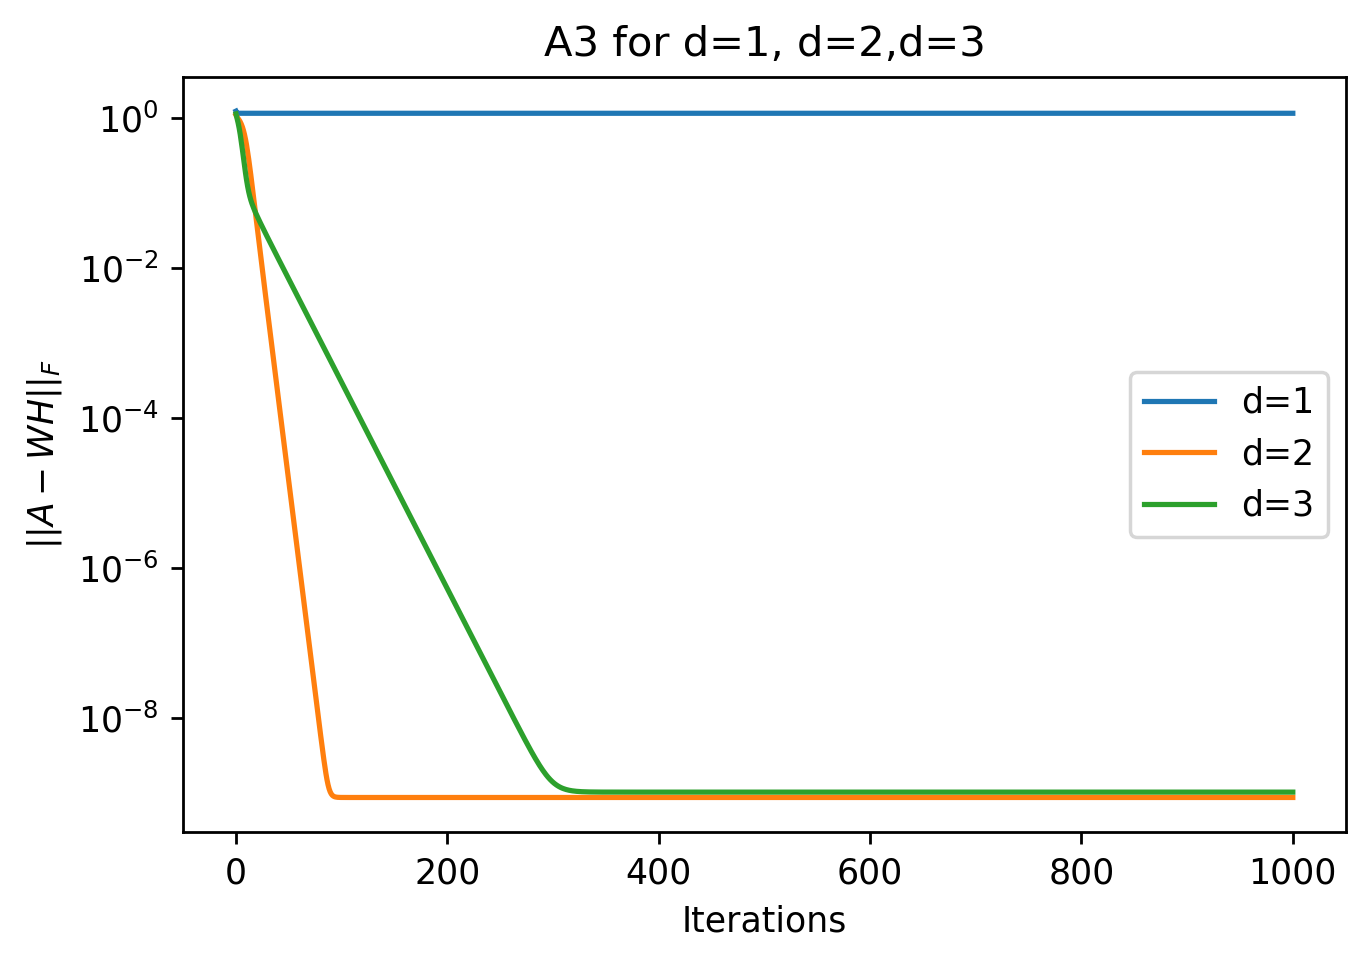

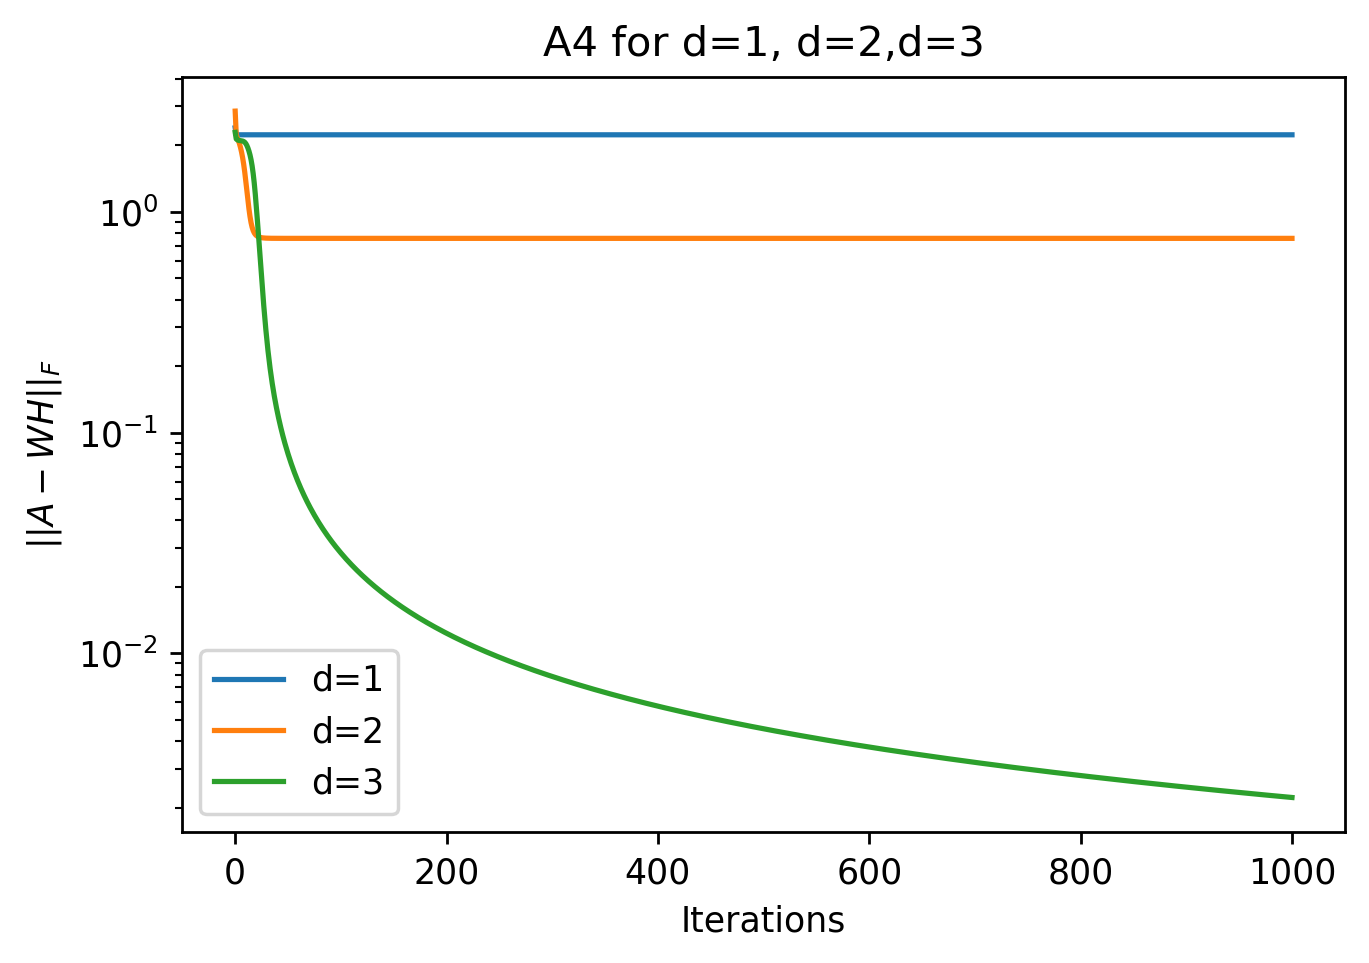

In [8]:
def oppg_1g():
    
    W_next_A3_1, H_next_A3_1, norms_A3_1 = NMF(A_3, 1, delta = 1e-9, maxiter = 1000, seed = 0,store_norms=True)
    W_next_A3_2, H_next_A3_2, norms_A3_2 = NMF(A_3, 2, delta = 1e-9, maxiter = 1000, seed = 0,store_norms=True)
    W_next_A3_3, H_next_A3_3, norms_A3_3 = NMF(A_3, 3, delta = 1e-9, maxiter = 1000, seed = 0,store_norms=True)
    iters = np.linspace(0,1000,1000)
    plt.plot(iters,norms_A3_1,label = "d=1")
    plt.plot(iters,norms_A3_2,label= "d=2")
    plt.plot(iters,norms_A3_3,label = "d=3")
    plt.title("A3 for d=1, d=2,d=3")
    plt.yscale('log')
    plt.xlabel("Iterations")
    plt.ylabel(r'$\vert\vert{A-WH}\vert\vert_F$')
    plt.legend()

    plt.show()

    W_next_A4_1, H_next_A4_1, norms_A4_1 = NMF(A_4, 1, delta = 1e-9, maxiter = 1000, seed = 0,store_norms=True)
    W_next_A4_2, H_next_A4_2, norms_A4_2 = NMF(A_4, 2, delta = 1e-9, maxiter = 1000, seed = 0,store_norms=True)
    W_next_A4_3, H_next_A4_3, norms_A4_3 = NMF(A_4, 3, delta = 1e-9, maxiter = 1000, seed = 0,store_norms=True)
    plt.plot(iters,norms_A4_1,label = "d=1")
    plt.plot(iters,norms_A4_2,label= "d=2")
    plt.plot(iters,norms_A4_3,label = "d=3")
    plt.title("A4 for d=1, d=2,d=3")
    plt.yscale('log')
    plt.xlabel("Iterations")
    plt.ylabel(r'$\vert\vert{A-WH}\vert\vert_F$')
    plt.legend()

    plt.show()






oppg_1g()


# Task 2

In [9]:
def load_images(N):
    """
    Loads images from cryptopunk dataset. The loading order is deterministic,
    so for a certain N the exact same images will be loaded. 
    Input:
        N, integer, number of images to load
    Output:
        faces, (24,24,4,N) numpy array containing images
    """

    # Allocate array to store images
    faces = np.zeros((24,24,4,N))

    # Iteration variable
    i = 0

    # Iterate over folders
    for subdir, dirs, files in os.walk('./imgs'):

        # Iterate over files
        for file in files:

            # Filepath to load from
            filepath = subdir + os.sep + file

            # Make sure that the file is a .png
            if filepath[-3:] == 'png':

                # Load the image
                im = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)

                # Convert it to RGBA and rescale pixels
                faces[:,:,:,i] = cv2.cvtColor(im, cv2.COLOR_BGRA2RGBA)/255.0

                i+=1
            if i == N:
                break
    return faces

In [10]:
# Code for plotting images
def plotimgs(imgs, nplot = 8, rescale = False, filename = None):
    """
    Plots nplot*nplot images on an nplot x nplot grid. 
    Saves to given filename if filename is given
    Can also rescale the RGB channels
    input:
        imgs: (24,24,4,N) or (24,24,3,N) array containing images, where N > nplot**2
        nplot: integer, nplot**2 images will be plotted
        rescale: bool
        filename: string, figure will be saved to this location. Should end with ".png".
    """
    # We will change some of the parameters of matplotlib, so we store the initial ones
    oldparams = plt.rcParams['figure.figsize']

    # New params to make better plot. There definitely exists better ways of doing this
    plt.rcParams['figure.figsize'] = (16, 16)

    # Initialize subplots
    fig, axes = plt.subplots(nplot,nplot)

    # Set background color
    plt.gcf().set_facecolor("lightgray")

    # Iterate over images
    for idx in range(nplot**2):
        
        # Indices
        i = idx//nplot; j = idx%nplot

        # Remove axis
        axes[i,j].axis('off')

        # Rescale RGB channels by dividing my maximal value
        if rescale:
            scaled_img = np.copy(imgs[:,:,:,idx])
            scaled_img[:,:,:3] = scaled_img[:,:,:3]/np.max(scaled_img[:,:,:3])
            axes[i,j].imshow(scaled_img)
        else:
            axes[i,j].imshow(imgs[:,:,:,idx])
    
    # Tight layout so images will appear closer together
    plt.tight_layout()

    # Save if filename is given
    if filename is not None:
        plt.savefig(filename)

    plt.show()

    # Return to old parameters
    plt.rcParams['figure.figsize'] = oldparams

## 2a

In [11]:
def plot_random_faces():
    # Load all 10000 images
    faces = load_images(10000)

    # Select N random images
    choices = np.random.choice(faces.shape[-1],N, replace = False)
    faces = faces[:,:,:,choices]

    # Check that the shape is correct
    print(faces.shape)

    # Example of plotting 8 times 8 images stored in "faces" and saving the output to a file named "punks.png"
    plotimgs(faces, 8, filename="punks.png")
# plot_random_faces()

## 2b
Jeg har funnet ut at det er raskere å hente bildedata fra en npz fil vs loadimages, så jeg gjør det


In [12]:
def generate_face_data():
    '''
    This funtion loads all images to numpy arrays and saves them to a selection of smaller arrays. This
    is to reduce runtime while testing the upcomming calculations.
    '''
    # Load all 10000 images
    faces = load_images(10000)

    # Select 500 random images
    N = 500
    choices = np.random.choice(faces.shape[-1],N, replace = False)
    faces_500 = faces[:,:,:,choices]
    assert (faces_500.shape == (24, 24, 4, 500))  # Make sure the dimensions are correct
    
    # Select 100 random images
    N = 100
    choices = np.random.choice(faces.shape[-1],N, replace = False)
    faces_100 = faces[:,:,:,choices]
    assert (faces_100.shape == (24, 24, 4, 100))  # Make sure the dimensions are correct
    
    # Select 100 random images
    N = 4
    choices = np.random.choice(faces.shape[-1],N, replace = False)
    faces_4 = faces[:,:,:,choices]
    assert (faces_4.shape == (24, 24, 4, 4))  # Make sure the dimensions are correct

    
    np.savez(
        'faces',
        faces = faces,
        faces_500 = faces_500,  # 500 faces
        faces_100 = faces_100,  # 100 faces
        faces_4 = faces_4       # 4 faces
    )
generate_face_data()

In [13]:
def find_mean_faces(face_data):
    '''
    Contrary to the name, this function does not actualy find 'mean' faces, but rather the mean value of each pixel
    in the faces dataset.
    Input:
        face_data: string, the face array for which we will calculate the mean
    The output is saved to a file as a 24*24*4 array:
        Filename:   mean_faces.npz
        Arraydata:  face_mean
    '''
    # Start by loading the faces that are to be used
    faces_data = np.load('faces.npz')
    faces = faces_data[face_data]

    ########################################################
    # Create some test-data to verify that the 
    # method works
    # faces[:, :, :, 0] = [[[1/4, 0, 0, 1 ]]]   # red red
    # faces[:, :, :, 1] = [[[1/4, 0, 0, 1 ]]]   # red red
    # faces[:, :, :, 2] = [[[1/4, 0, 0, 1 ]]]   # red red
    # faces[:, :, :, 3] = [[[1/4, 0, 0, 1 ]]]   # nothing

    # Alter face 3
    # faces[6:18, 6:18, :, 3] = [[[0, 1, 0, 1]]]  # green
    # The mean should be yellow

    ########################################################


    # The images are stored on the last index of the faces array
    mean_face = np.mean(faces, axis = 3)
    assert(mean_face.shape == (24, 24, 4)) # assert the correct shape

    np.savez(
        'mean_face.npz',
        mean_face = mean_face
    )
    
    
    # Plotting
    plt.imshow(mean_face[:, :, :])
    plt.axis('off')
    plt.show()

#find_mean_faces('faces')

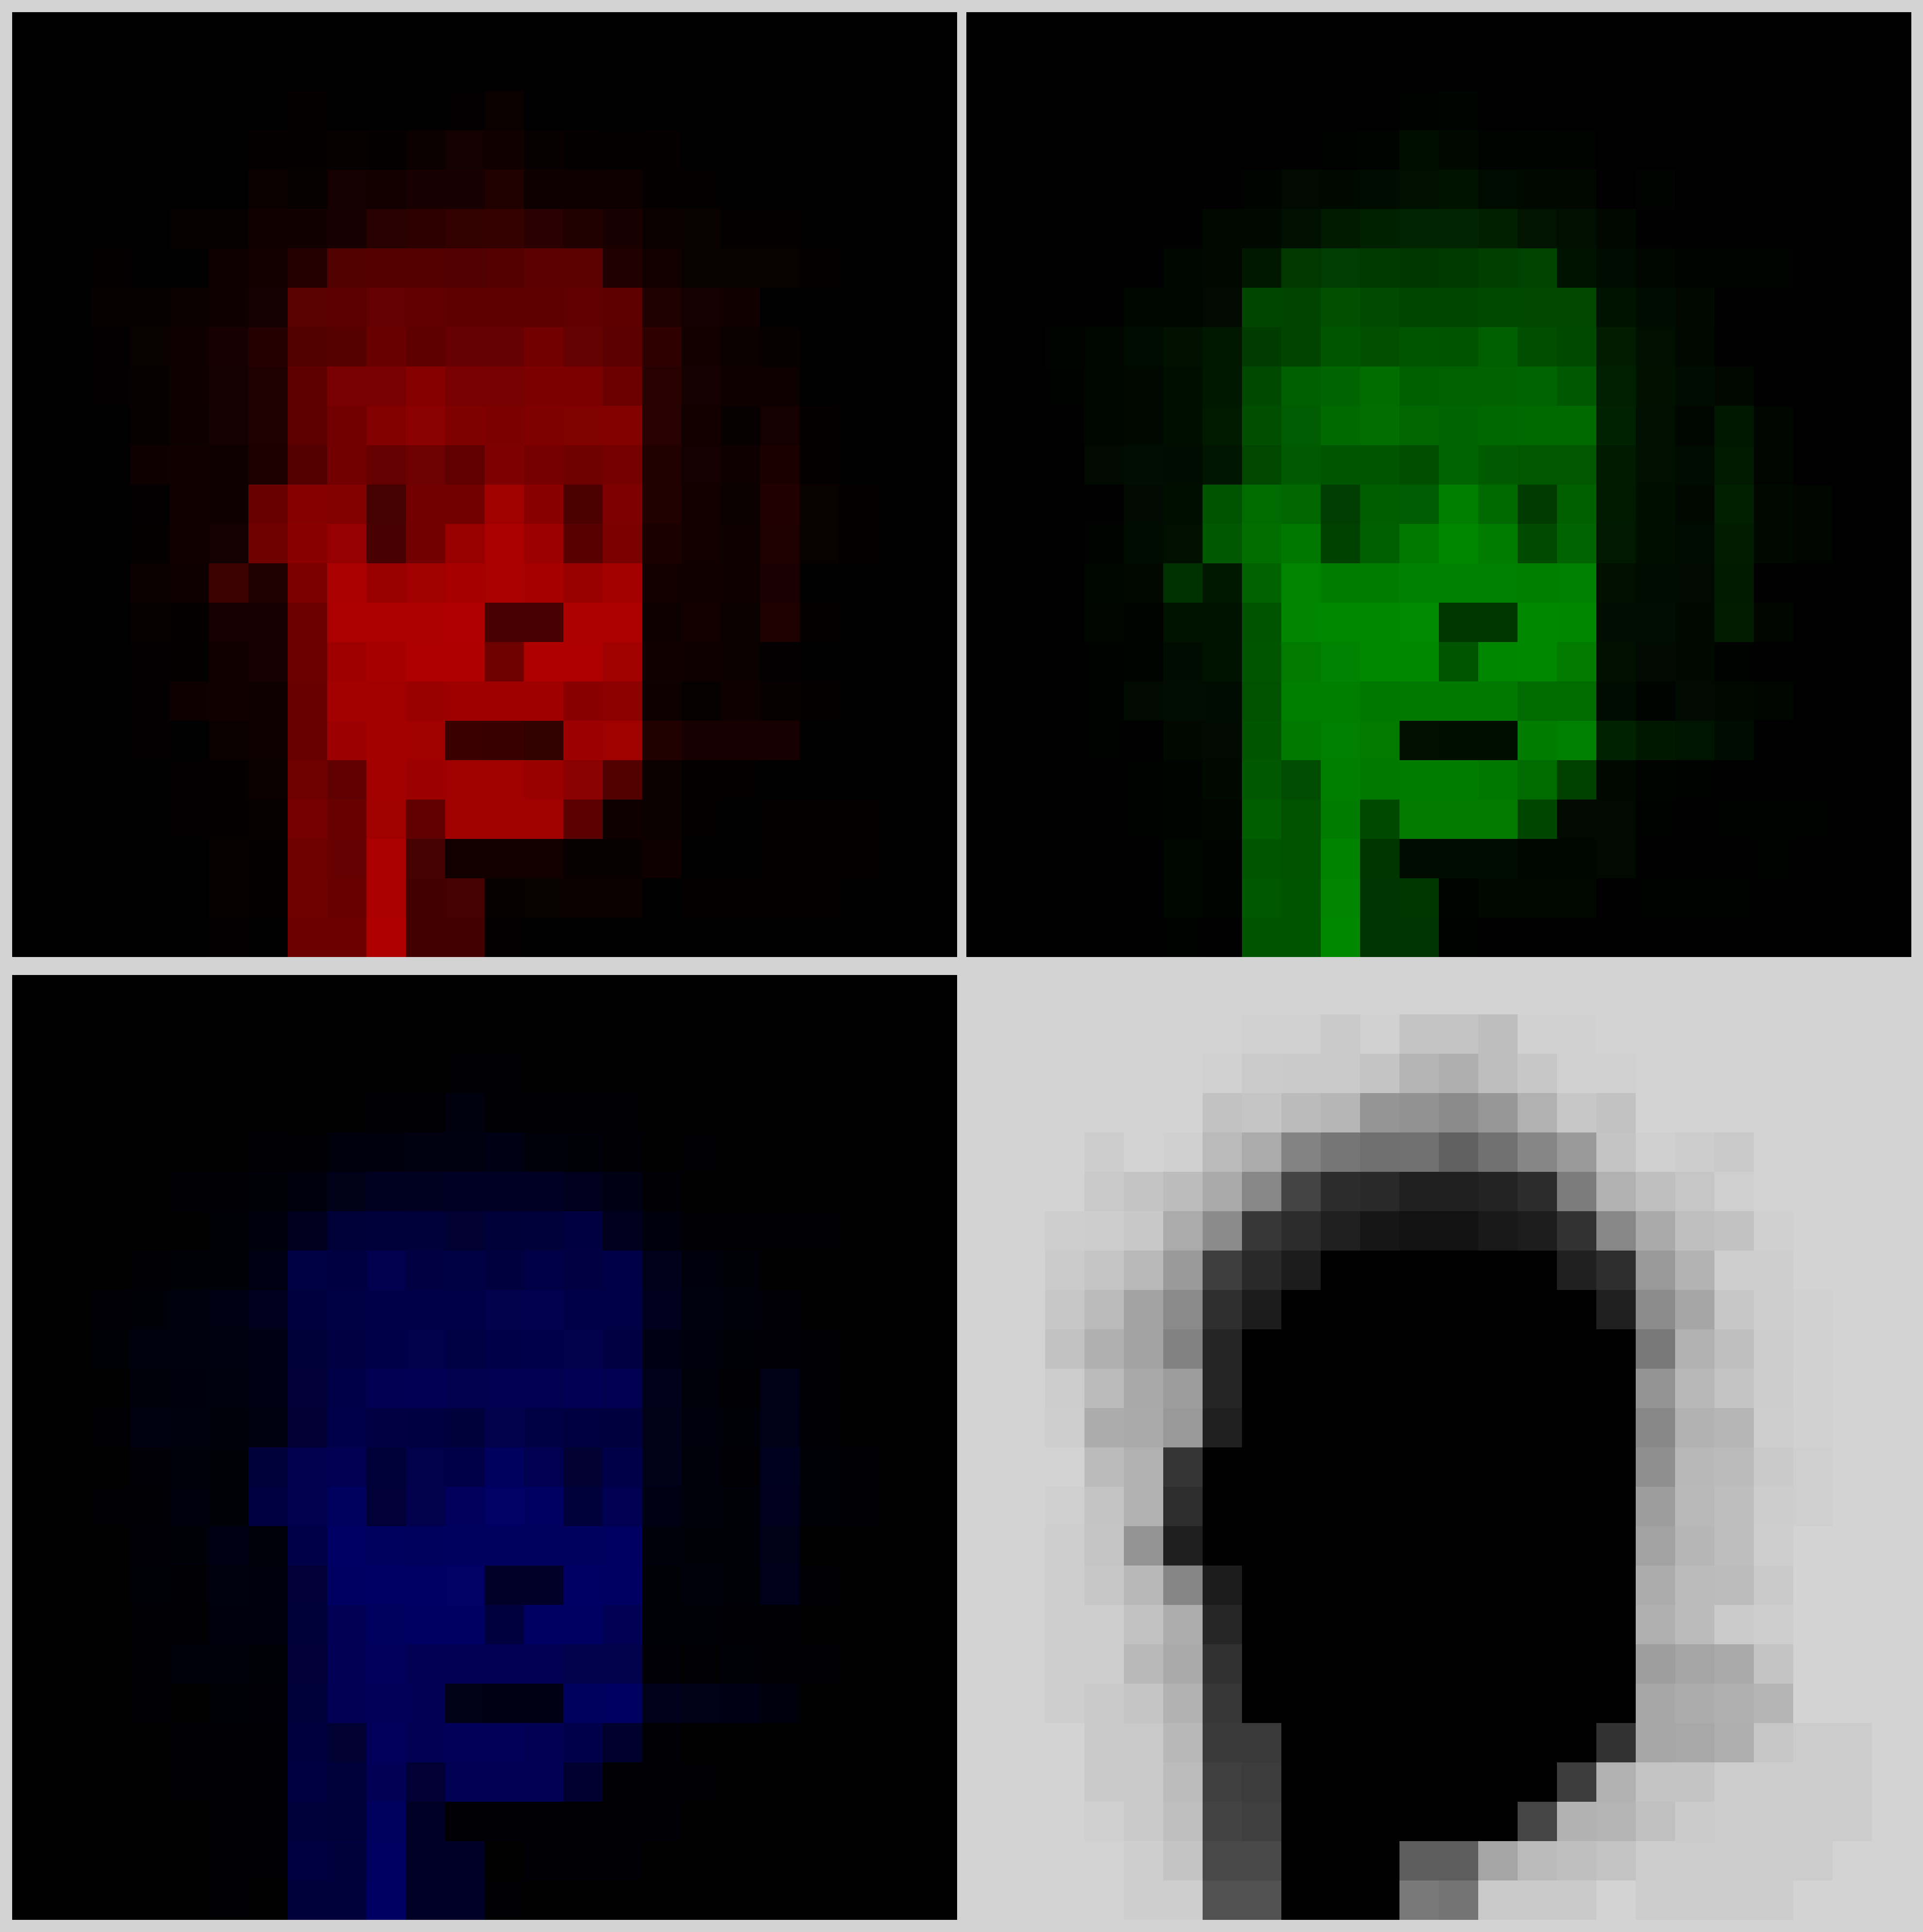

In [14]:
def mean_chanels():
    # Load the relevant data
    face_data = np.load('mean_face.npz')
    mean_face = face_data['mean_face']
    assert(mean_face.shape == (24, 24, 4))
    # mean_face = np.reshape(mean_face, (24, 24, 4, 1))
    
    # Array containing the four faces that are to be plotted
    faces = np.zeros(shape=(24, 24, 4, 4))

    
    #################################################### 
    #       Isolate the chanels

    # Red
    red_face = np.copy(mean_face)
    red_face[:,:,[1, 2]] = 0
    faces[:,:,:, 0] = red_face[:,:,:]
    
    # Green
    green_face = np.copy(mean_face)
    green_face[:,:,[0, 2]] = 0
    faces[:,:,:, 1] = green_face[:,:,:]
    

    # Blue
    blue_face = np.copy(mean_face)
    blue_face[:,:,[0, 1]] = 0
    faces[:,:,:, 2] = blue_face[:,:,:]
    
    # Want all the color channels to have full opacity
    faces[:, :, 3, [0, 1, 2]] = 1

    # Opacity
    opacity_face = np.copy(mean_face)
    opacity_face[:,:,[0, 1, 2]] = 0
    faces[:,:,:, 3] = opacity_face[:,:,:]

    ####################################################    
    

    # Plot all four singular chanels
    plotimgs(faces, 2)

    ##########################################################
    #   Plot a single face
    # plt.imshow(faces[:, :, :, 0])
    # plt.axis('off')
    # plt.show()
    ##########################################################
    
    
mean_chanels()

In [15]:
def split_and_reshape(faces, N):
    '''
    Splitting the faces into RGB- and opacity-channel, and reshaping the faces

    Input:
        faces: array
        N: number of faces
    
    Output:
        faces_rgb: array, the RBG-channel
        faces_opacity: array, the opacity-channel
        faces_reshaped: array, the reshaped faces-array
    '''
    # Split the images into opacity and rgb channels
    faces_opacity = faces[:,:,3,:]
    faces_rgb = faces[:,:,:3,:]
    shape = faces_rgb.shape

    # Clever reshape "trick". This is the matrix we will apply the NMF to
    faces_reshaped = faces_rgb.reshape(np.prod(shape)//N, N)

    return faces_rgb, faces_opacity, faces_reshaped

## 2c

In [16]:
def calculate_NMF(faces, d_val, plot_cols = True, reshape_faces = True):  
    '''
    Calculating the NMF of the 3 color channels, and plotting the the columns of W interpreted as RGB images.

    Input:
        d_val: int, number of columns in the W-matrix
        
    Output:
        W: array
        H: array
    '''
    
    N = 500
    if reshape_faces == True:
        faces_rgb, faces_opacity, faces_reshaped = split_and_reshape(faces, N)
    else:
        faces_reshaped = np.copy(faces)

    # Calculate the NMF of the A-matrix
    W, H = NMF(faces_reshaped, d_val)

    # Reshaping the W-matrix into a 24×24×3x64-matrix
    W = np.reshape(W, (24, 24, 3, d_val))
    assert (W.shape == (24, 24, 3, d_val))

    if plot_cols == True:
        # Plot the columns of W 
        try:
            plotimgs(W, nplot = 16, rescale = False, filename = None)
        except:
            print("Unable to plot W, skipping this step")


    # Returning the W- and H-matrixes
    return W, H

# W_calculated, H_calculated = calculate_NMF(64)

# W_calculated, H_calculated = calculate_NMF(64, 'faces_500')

In [17]:
def to_c_funk():
    faces_data = np.load('faces.npz')
    faces = faces_data['faces_500']
    W_calculated, H_calculated = calculate_NMF(faces, 128)
    return W_calculated, H_calculated


In [18]:
def generate_wh_data():
    W_calculated, H_calculated = to_c_funk()

    np.savez(
        'W_H_matrices.npz',
        W = W_calculated,
        H = H_calculated
    )
# generate_wh_data()

## 2d

In [19]:
def get_faces_with_opacity(reconstructed_faces, faces, faces_rgb, faces_opacity):
    faces_with_opacity = np.zeros(faces.shape)
    faces_with_opacity[:, :, :3, :] = reconstructed_faces.reshape(faces_rgb.shape)
    faces_with_opacity[:, :, 3, :] = faces_opacity
    return faces_with_opacity

In [20]:
def calculate_reconstructions(W, H, plot_original_faces = False, original_faces_name = ''):
    '''
    Calculating the reconstructions WH, and plotting these

    Input:
        d_val: int, number of columns in the W-matrix
        
    Output:
        W: array, previously calculated W-matrix
        H: array, previously calculated W-matrix
    '''
    faces_data = np.load('faces.npz')
    faces = faces_data['faces_500']
    if plot_original_faces == True:
        # faces = faces_data[original_faces_name]
        plotimgs(faces, nplot = 8, rescale = False, filename = None)

    N = 500
    faces_rgb, faces_opacity, faces_reshaped = split_and_reshape(faces, N)
    
    faces_with_opacity = get_faces_with_opacity(np.dot(W, H), faces, faces_rgb, faces_opacity)

    plotimgs(faces_with_opacity, nplot = 8, rescale = False, filename = None)

calculate_reconstructions(W_calculated, H_calculated)

NameError: name 'W_calculated' is not defined

## 2e og 2f

In [21]:
def calculate_norms(faces, d_vals, iteration_norms, final_norms, reshape_faces = True, norm_with_noisy_faces = False, original_A = []):
    '''
    Calculate the norms related to the NMF-function. You can either choose to calculate the norms for every iteration of the NMF-function, or just the final norm after the NMF has run.

    Input:
        d_vals: array, array containing the different int values for number of columns in the W-matrix
        iteration_norms: bool, if the functions shall return the norms for every iteration
        final_norms: bool, if the functions shall return the final norms after the NMF has run
        
    Output:
        iteration_norms_arr: array, the calculated iterations norms
        final_norms_arr: array, the calculated final norms
    '''
    
    N = 500
    iteration_norms_arr = []
    final_norms_arr = []
    
    # Loading the image-data
    #faces_data = np.load('faces.npz')
    #faces = faces_data['faces_500'][:, :, 0:3, :]
    #faces = faces_data['faces_500']

    if reshape_faces == True:
        faces_rgb, faces_opacity, faces_reshaped = split_and_reshape(faces, N)
    else:
        faces_reshaped = np.copy(faces)

    for i in range(len(d_vals)):
        W, H, n = NMF(faces_reshaped, d_vals[i], delta = 1e-9, maxiter = 1000, seed = 0, store_norms = True)
        
        iteration_norms_arr.append(n)

        if norm_with_noisy_faces == False:
            final_norms_arr.append(np.linalg.norm(faces_reshaped - np.dot(W, H), 'fro'))
        else: 
            final_norms_arr.append(np.linalg.norm(original_A - np.dot(W, H), 'fro'))
    
    if iteration_norms == True and final_norms == False:
        return iteration_norms_arr
    elif iteration_norms == False and final_norms == True:
        return final_norms_arr
    else:
        return iteration_norms_arr, final_norms_arr

In [22]:
def plot_norms(norms, d_vals, plot_iteration_norms, plot_final_norms):
    if plot_iteration_norms == True:
        x_arr = np.arange(0, len(norms[0]), 1)
        plt.plot(x_arr,norms[0], label = f'd = {d_vals[0]}')
        plt.plot(x_arr,norms[1], label = f'd = {d_vals[1]}')
        plt.plot(x_arr,norms[2], label = f'd = {d_vals[2]}')
        plt.title("Norms as function of iterations")
        plt.xlabel(r'$k$')
        plt.ylabel(r'$\vert\vert{A-W_{k} H_{k}}\vert\vert_{F}$')
        plt.legend()
        plt.yscale('log')
        plt.show()

    elif plot_final_norms == True:
        plt.plot(d_vals, norms)
        plt.title(r'Norms as function of $d$')
        plt.xlabel(r'$d$')
        plt.ylabel(r'$\vert\vert{A-WH}\vert\vert_{F}$')
        plt.yscale('log')
        plt.show()


In [23]:
# Dette er koden til 2e
def iteration_norms():
    faces_data = np.load('faces.npz')
    faces = faces_data['faces_500']

    d_vals = [16, 32, 64]
    norms_calculated = calculate_norms(faces, d_vals, True, False)
    plot_norms(norms_calculated, d_vals, plot_iteration_norms = True, plot_final_norms = False)

#iteration_norms()  

In [24]:
# Dette er koden til 2f
def final_norms():
    faces_data = np.load('faces.npz')
    faces = faces_data['faces_500']

    d_vals = [16, 64, 128, 256]
    norms_calculated = calculate_norms(faces, d_vals, False, True)
    plot_norms(norms_calculated, d_vals, plot_iteration_norms = False, plot_final_norms = True)

# final_norms()

Shape of W: (24, 24, 3, 128) 
Shape of H: (128, 500)
d = 128


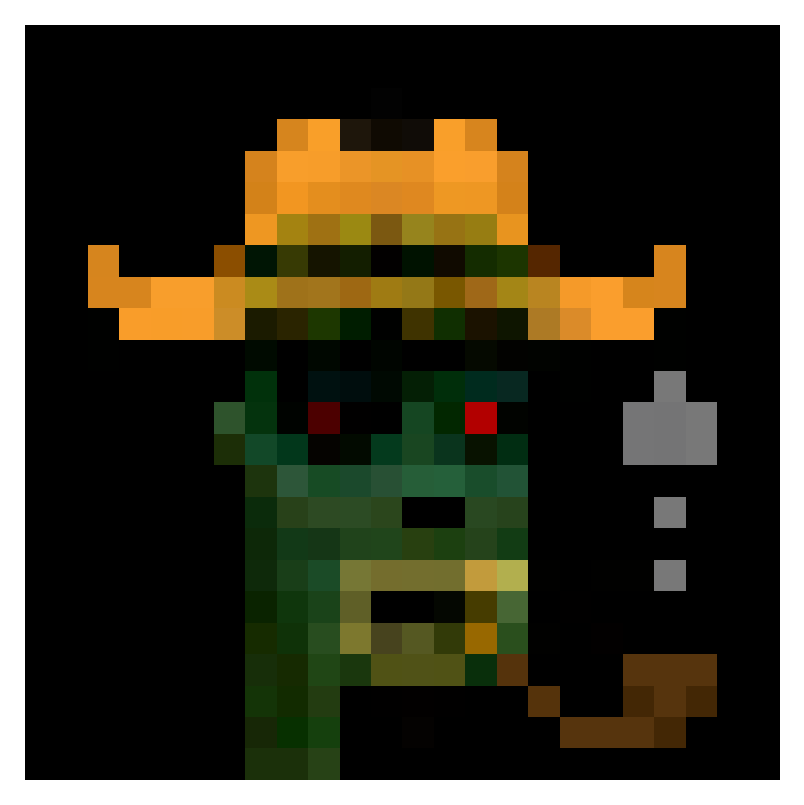

In [27]:
def custom_face():

    # Unpack the relevant data 
    matrix_data = np.load('W_and_H_128.npz')
    W, H = matrix_data['W_calculated'], matrix_data['H_calculated']


    print(f'Shape of W: {np.shape(W)} \nShape of H: {np.shape(H)}')
    
    # plotimgs(np.dot(W, H), rescale=True)

    # calculate_reconstructions(W, H, plot_original_faces=True)

    # Find dim(W)
    d = np.shape(W)[-1]
    print(f'd = {d}')

    # Create the cunstom face vector
    custom_face = np.zeros(shape=(d, 1))
    custom_face[45] = 3.5   # Cowboy hat
    custom_face[66] = 2     # Zombie
    custom_face[84] = 0.7   # Pipe


    # Plot the basis of W
    # plotimgs(W, nplot=12, rescale = True, filename='base_vectors')

    ##########################################################
    #   Plot a single face
    plt.imshow(np.dot(W, custom_face)[:, :, :, 0])
    plt.axis('off')
    # plt.savefig('custom_face')
    plt.plot()
    ##########################################################
    

custom_face()

# Task 3

Det som er skrevet under er kopiert fra utdelt kode

## 3a

In [ ]:
# Legge til støy
def add_noise(imgs_reshaped, sigma = 0.1):
    """
    Adds gaussian noise to images as described in text.
    Note that imgs must be given as a (24*24*3, N) numpy array, i.e the reshaped images
    Input:
        imgs_reshaped: (1728,N) numpy array
        sigma: scalar, noise level
    Output:
        noisy_faces: (1728,N) numpy array containing noisy images
    """
    # Noise level
    sigma = 0.1

    # Array that will store the rgb channels of the noisy images
    noisy_faces = np.copy(imgs_reshaped)

    # Number of noisy values we need
    nnzero = imgs_reshaped[np.nonzero(imgs_reshaped)].shape[0]

    # Sample noisy values and add noise
    noise = np.random.normal(0.0,1,nnzero)
    noisy_faces[np.nonzero(imgs_reshaped)] += sigma*noise

    # Clip to lie between 0 and 1 so that we can still interpret them as images
    noisy_faces = np.maximum(0.0,np.minimum(1.0, noisy_faces))

    return noisy_faces

In [ ]:
def add_noise_to_images():
    N = 500
    faces_data = np.load('faces.npz')
    faces = faces_data['faces_500']

    faces_rgb, faces_opacity, faces_reshaped = split_and_reshape(faces, N)

    noisy_faces = add_noise(faces_reshaped)

    np.savez(
        'noisy_faces',
        faces = faces, 
        faces_rgb = faces_rgb, 
        faces_opacity = faces_opacity,
        faces_reshaped = faces_reshaped,
        noisy_faces = noisy_faces
    )
    
    # Calculate the error of the noisy images
    noise_residual = np.linalg.norm(noisy_faces - faces_reshaped, 'fro')
    print(f"Norm: {round(noise_residual, 2)}")

    # For plotting noisy images we add the opacity
    noisy_faces_with_opacity = np.zeros(faces.shape)
    noisy_faces_with_opacity[:,:,:3,:] = noisy_faces.reshape(faces_rgb.shape)
    noisy_faces_with_opacity[:,:,3,:] = faces_opacity
    plotimgs(noisy_faces_with_opacity)
    
#add_noise_to_images()

## 3b

In [ ]:
def remove_nosie():
    # Importing data
    noisy_faces_data = np.load('noisy_faces.npz')
    noisy_faces = noisy_faces_data['noisy_faces']
    faces = noisy_faces_data['faces']
    faces_rgb = noisy_faces_data['faces_rgb']
    faces_opacity = noisy_faces_data['faces_opacity']


    # Calculating W and H, and plotting the columns of W
    W, H = calculate_NMF(noisy_faces, 64, plot_cols = True, reshape_faces = False)
    
    N = 500
    noisy_faces_with_opacity = get_faces_with_opacity(np.dot(W, H), faces, faces_rgb, faces_opacity)

    # Plotting the reconstructions
    plotimgs(noisy_faces_with_opacity, nplot = 8, rescale = False, filename = None)
    # plotimgs(np.dot(W, H), nplot = 8, rescale = False, filename = None)
#remove_nosie()

## 3c

In [ ]:
def plot_norms_for_noisy_faces():
    noisy_faces_data = np.load('noisy_faces.npz')
    noisy_faces = noisy_faces_data['noisy_faces']
    faces_reshaped = noisy_faces_data['faces_reshaped']

    d_vals = [64, 128, 256, 512]
    norms_calculated = calculate_norms(noisy_faces, d_vals, iteration_norms = False, final_norms = True, reshape_faces = False, norm_with_noisy_faces = True, original_A = faces_reshaped)
    plot_norms(norms_calculated, d_vals, plot_iteration_norms = False, plot_final_norms = True)

# plot_norms_for_noisy_faces()